In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from pathlib import Path
data_path = Path("../src")
dataset = Path(data_path / "AnnualCauseDeathNumbers.csv")
data = pd.read_csv(dataset)

### En Europa, estudiaremos varias causas de muerte entre varios países. 
### Los países escogidos serán:

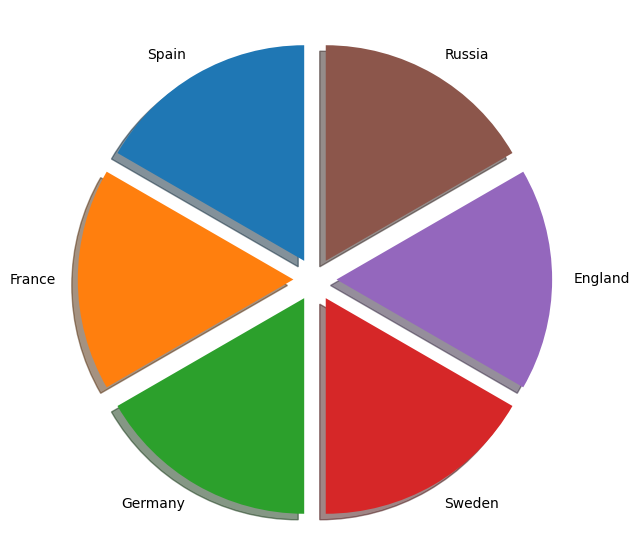

In [3]:
eu = {'Spain':1,'France':1,'Germany':1,'Sweden':1,'England':1,'Russia':1}
fig, ax = plt.subplots(figsize = (15,7))
explode =[0.1,0.1,0.1,0.1,0.1,0.1] 
ax.pie(eu.values(), labels=eu.keys(), explode=explode, shadow=True, startangle=90);

### Veremos en una tabla, la comparación de las causas de muerte de estos países en tandas de 5 años.

In [4]:
europa = data.query('Entity in ["Spain","France","Germany","Sweden","England","Russia"] & Year in [1990,1995,2000,2005,2010,2015,2019]')
europa

,Entity,Code,Year,Meningitis fatalities,Dementia fatalities,Parkinson fatalities,Nutritional deficiency fatalities,Malaria fatalities,Drowning fatalities,Interpersonal violence fatalities,...,Chronic kidney fatalities,Poisoning fatalities,Protein energy malnutrition fatalities,Road injury fatalities,Chronic respiratory fatalities,Chronic liver fatalities,Digestive disease fatalities,Fire fatalities,Acute hepatitis fatalities,Measles fatalities
1800,England,wb,1990,446,15700,4098,167,0,363,472,...,3995,227,70,4763,31523,3949,17533,626,19,2
1805,England,wb,1995,409,17661,4137,150,0,310,477,...,3680,242,67,3874,32087,4693,18843,538,19,1
1810,England,wb,2000,394,19397,4410,134,0,274,351,...,3702,195,71,3472,33280,6026,21573,466,18,0
1815,England,wb,2005,315,21345,5002,130,0,254,409,...,4121,126,85,3077,34866,6989,23624,380,21,1
1820,England,wb,2010,232,24179,5471,124,0,246,285,...,4791,113,89,2477,36510,7395,24410,324,20,1
1825,England,wb,2015,218,25662,6183,122,0,244,252,...,6026,105,89,2183,40274,7756,26138,302,18,1
1829,England,wb,2019,218,27257,6694,126,0,244,260,...,6288,107,94,2232,42289,7959,27005,312,18,1
2100,France,FRA,1990,466,18823,4255,2609,0,1026,1004,...,7118,234,2432,11984,22050,13686,29689,1064,38,5
2105,France,FRA,1995,358,21778,4627,2962,0,916,989,...,7079,206,2785,10149,22259,12861,28538,965,37,2
2110,France,FRA,2000,314,24825,5148,3230,0,1088,717,...,7837,204,3072,8873,20090,12699,27799,825,27,1


### Esta forma recoge muchos datos y es más complicado de sacar conclusiones. 
### A continuación, estudiaremos algunas causas en concreto.

In [5]:
agr_eu = europa.groupby(['Entity','Year'])['Dementia fatalities'].mean().unstack().T
agr_eu

Entity,England,France,Germany,Russia,Spain,Sweden
Year,,,,,,
1990,15700.0,18823.0,29984.0,23706.0,11872.0,3733.0
1995,17661.0,21778.0,33953.0,26650.0,16044.0,4382.0
2000,19397.0,24825.0,35327.0,27403.0,19317.0,4524.0
2005,21345.0,27698.0,35731.0,29104.0,22619.0,4968.0
2010,24179.0,31793.0,37332.0,34885.0,26240.0,5359.0
2015,25662.0,40527.0,44103.0,42768.0,27989.0,5639.0
2019,27257.0,46008.0,49557.0,48437.0,29208.0,5637.0


Hemos filtrado los datos anteriores para conseguir solamente las muertes por demencia. Aquí ya podemos contemplar unos números mucho más cercanos y comparar el número de muertes en cada año según el país.

Podemos observar las diferencias entre países, tanto como gobernamentales como geográficas, que creemos que puedan afectar a la muerte por demencia, que consideraremos una causa psicológica.

Vemos como en 1990, Inglaterra, Francia y España rondaban entre los 10000 y 20000 muertos, una cifra que fue creciendo de manera más o menos parecida en España e Inglaterra. En cambio, en Francia creció el doble de rápido. 

En Suecia, en cambio, observamos que hay un número de muertos muy bajo comparado con estos países. Hay que tener en cuenta el volumen de población que tienen estos países comparados con Suecia, aunque en muchas páginas se dice que en los países nórdicos hay una buena calidad de vida para las horas de sol existentes.

Rusia y Alemania, en 1990 se encontraban en el tramo final de la guerra fría, por tanto, su volumen inicial de muertos era mayor. Por otro lado, el número actual de muertos siguió creciendo de una forma mucho más rápida que en los demás países.

En todos los países hay un crecimiento de muertos por demencia. La salud mental es un tema que a día de hoy no se le da importancia, cuando con las herramientas que existen, es más sencillo dañarla.

### A continuación, vamos a comprobar el número de accidentes de tráfico mortales en Europa.

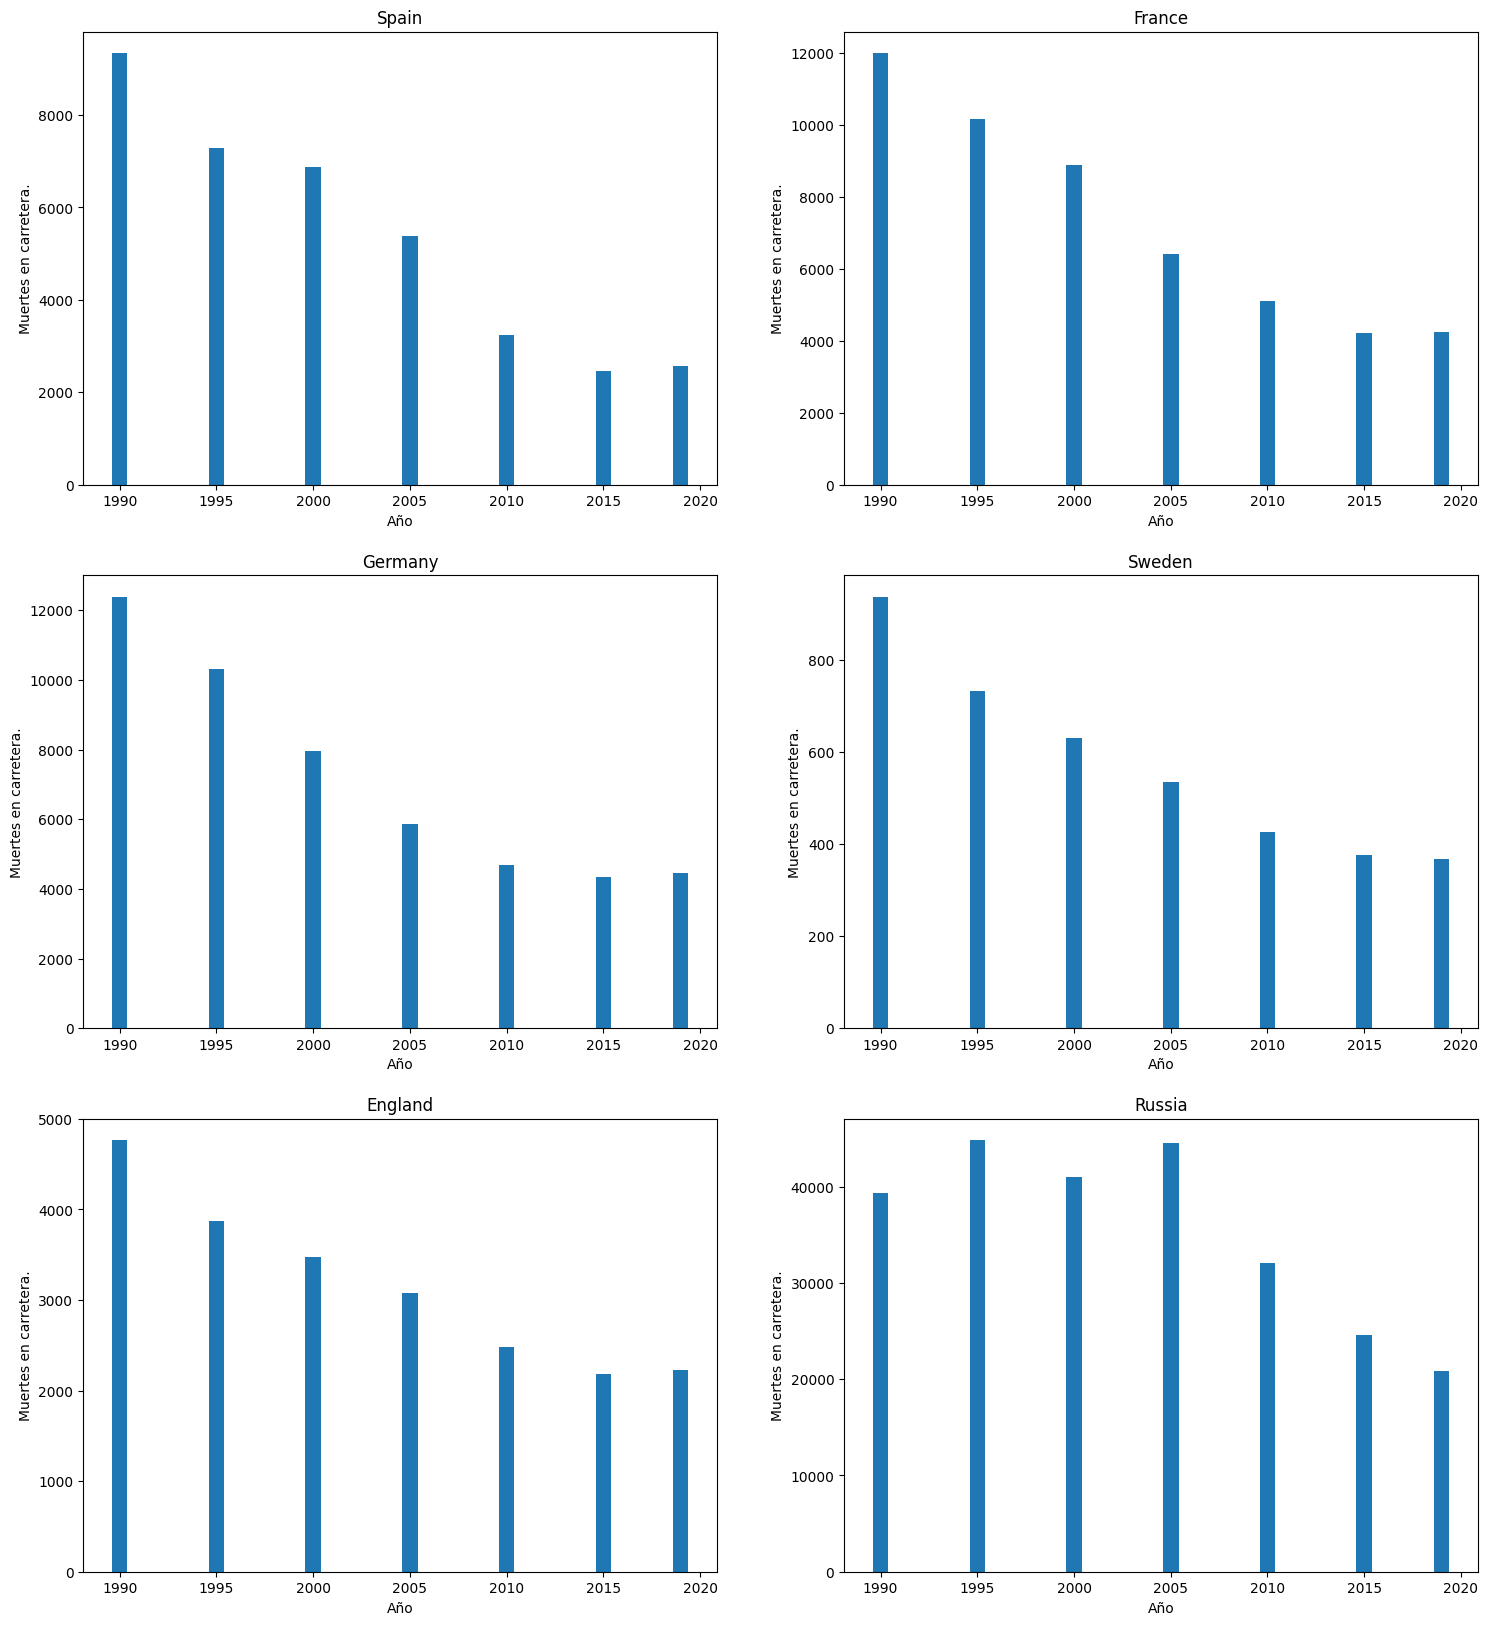

In [6]:
fig, ax = plt.subplots(nrows=3,ncols=2,figsize = (18,20))
eu = ["Spain","France","Germany","Sweden","England","Russia"]
agr_rif = europa.groupby(['Entity','Year'])['Road injury fatalities'].mean().unstack().T
i,j = 0,0
for p in eu:
    ax[i,j].bar(x=agr_rif.index, height=agr_rif[p])
    ax[i,j].set_title(p)
    ax[i,j].set_xlabel('Año')
    ax[i,j].set_ylabel('Muertes en carretera.')
    j += 1
    if j == 2:
        j = 0
        i += 1

Esta vez, lo haremos de forma gráfica. No tendremos números exactos, pero podemos sacar unas conclusiones más sencillas.

Vemos que en 1990 existían una gran cantidad de accidentes de tráfico, y cómo han ido bajando considerablemente con el paso de los años. ¿Cuál podría ser la razón? Existen tres principales: la mejoría de los coches, la mejoría de las carreteras y las campañas de convencimiento al volante.

### Continuando con otra causa de muerte, vamos a estudiar el VIH, también conocido como el sida.

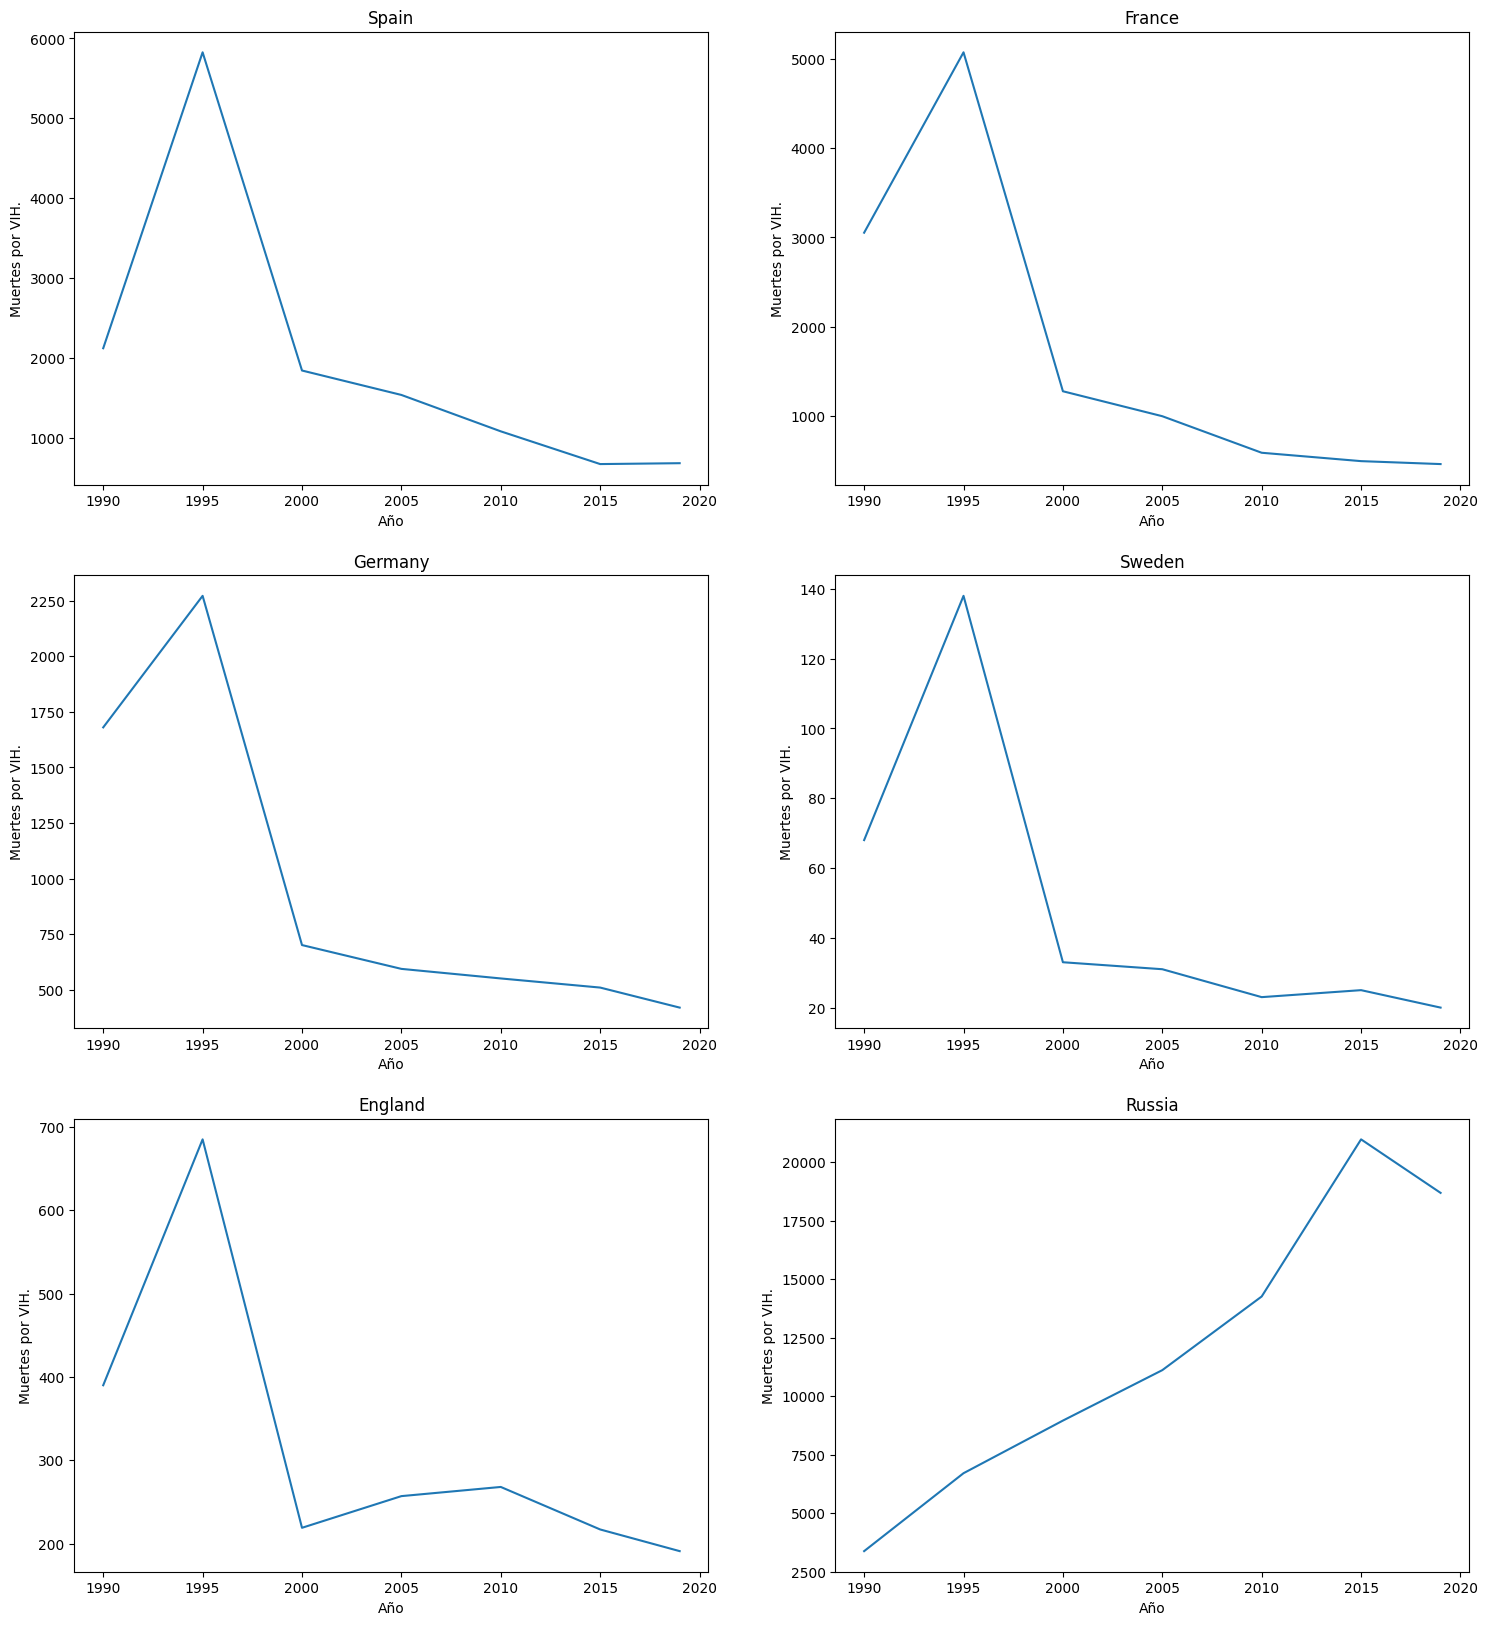

In [10]:
fig, ax = plt.subplots(nrows=3,ncols=2,figsize = (18,20))
agr_vih = europa.groupby(['Entity','Year'])['HIV/AIDS fatalities'].mean().unstack().T
i,j = 0,0
for p in eu:
    ax[i,j].plot(agr_vih.index, agr_vih[p])
    ax[i,j].set_title(p)
    ax[i,j].set_xlabel('Año')
    ax[i,j].set_ylabel('Muertes por VIH.')
    j += 1
    if j == 2:
        j = 0
        i += 1

Cambiaremos al gráfico de barras por ver otra perspectiva. Como sabemos, el VIH es una enfermedad mortal descubierta mundialmente en la época de los 90. Es una enfermedad de transmisión sexual que a día de hoy no tiene cura total.

Observamos como hubo un pico de muertos en 1995, y tras advertir a la población del peligro de la enfermedad, vemos como ha ido bajando de manera drástica con el paso de los años, aunque sigue existiendo.

El anuncio de varios famosos de las consecuencias de la enfermedad ayudaron a la causa. Nombrando algunos pueden ser Magic Johnson, que terminó su carrera como deportista por el VIH y creó una fundación, o Freddy Mercury, que llegó a perder la vida a consecuencia de la enfermedad.

### Otra causa de muerte a estudiar es la insuficiencia nutricional.

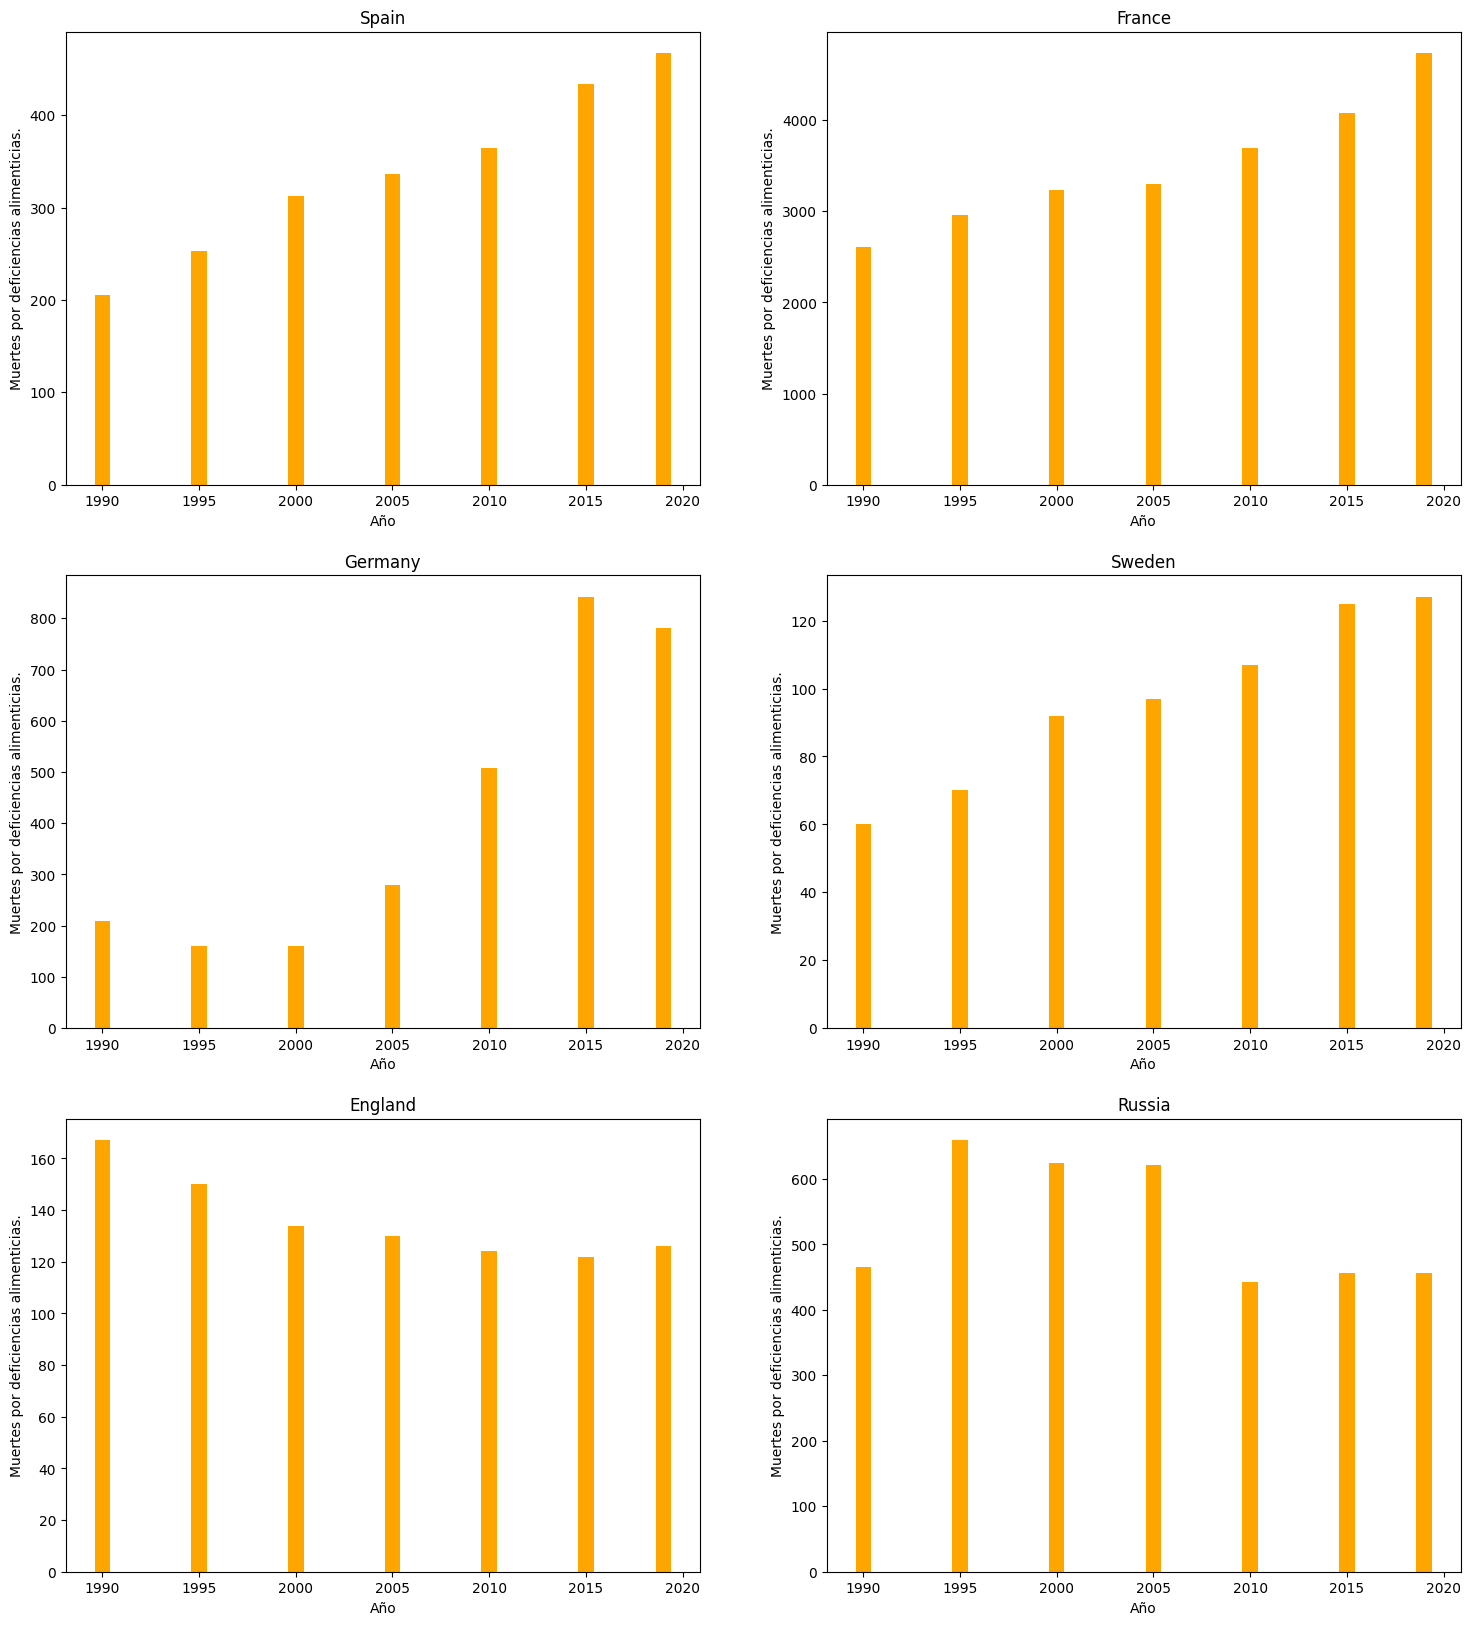

In [14]:
agr_ndf = europa.groupby(['Entity','Year'])["Nutritional deficiency fatalities"].mean().unstack().T
fig, ax = plt.subplots(nrows=3,ncols=2,figsize = (18,20))
i,j = 0,0
for p in eu:
    ax[i,j].bar(x=agr_ndf.index, height=agr_ndf[p], color='Orange')
    ax[i,j].set_title(p)
    ax[i,j].set_xlabel('Año')
    ax[i,j].set_ylabel('Muertes por deficiencias alimenticias.')
    j += 1
    if j == 2:
        j = 0
        i += 1

Aquí vemos que es una causa de muerte que va creciendo con el paso del tiempo. En mi opinión, la causa de que estos números crezcan es psicologica; existen muchos casos de bulimia, anorexia... que acaban con la vida de la persona. 